In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree

In [11]:
df=pd.read_csv('C:\\Users\\Trivikram\\ML_Projects\\Data\\weather.csv')
df

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [12]:
X=df[['outlook','temperature','humidity','windy']]
y=df[['play']]
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X, y)

5

In [13]:
categCol=X.columns

In [14]:
predictions=[None]*df.shape[0]
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    enc = OneHotEncoder(handle_unknown='ignore')
    binaryValues=enc.fit_transform(X_train[categCol]).toarray()
    newCol=list(enc.get_feature_names(categCol))
    categTrain = pd.DataFrame(binaryValues,columns=newCol,index=X_train.index)
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(categTrain,y_train)
    binaryvalues=enc.transform(X_test[categCol]).toarray()
    categTest = pd.DataFrame(binaryvalues,columns=newCol,index=X_test.index)
    predict=clf.predict(categTest)
    for i in range(len(predict)):
        predictions[test_index[i]]=predict[i]


TRAIN: [ 2  3  4  5  7  8  9 10 11 12 13] TEST: [0 1 6]
TRAIN: [ 0  1  4  5  6  7  9 10 11 12 13] TEST: [2 3 8]
TRAIN: [ 0  1  2  3  6  7  8 10 11 12 13] TEST: [4 5 9]
TRAIN: [ 0  1  2  3  4  5  6  8  9 11 13] TEST: [ 7 10 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12] TEST: [11 13]


In [15]:
accuracy_score(predictions, y)

0.6428571428571429

In [16]:
enc = OneHotEncoder(handle_unknown='ignore')
binaryValues=enc.fit_transform(X[categCol]).toarray()
newCol=list(enc.get_feature_names(categCol))
encoded_X= pd.DataFrame(binaryValues,columns=newCol,index=X.index)

In [17]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(encoded_X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[Text(186.0, 195.696, 'X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(148.8, 152.208, 'X[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(74.4, 108.72, 'X[1] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(111.60000000000001, 65.232, 'X[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 108.72, 'X[9] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(260.40000000000003, 65.232, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

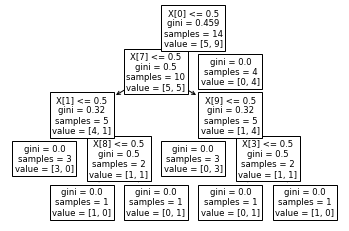

In [18]:
tree.plot_tree(clf.fit(encoded_X,y)) 

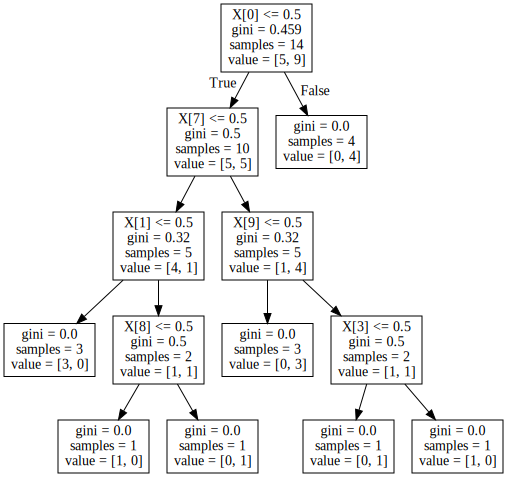

In [19]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [20]:
encoded_X

,outlook_overcast,outlook_rainy,outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_False,windy_True
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
